<a href="https://colab.research.google.com/github/parmarsuraj99/10DaysofMLChallenge/blob/master/day4/Day4_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle competitions download -c expedia-personalized-sort

 99% 409M/414M [00:06<00:00, 69.1MB/s]
100% 414M/414M [00:06<00:00, 62.6MB/s]
 52% 14.0M/27.2M [00:00<00:01, 13.5MB/s]
100% 27.2M/27.2M [00:00<00:00, 39.7MB/s]
 33% 9.00M/27.1M [00:01<00:02, 7.65MB/s]
100% 27.1M/27.1M [00:01<00:00, 23.4MB/s]
 19% 5.00M/26.0M [00:00<00:02, 9.40MB/s]
100% 26.0M/26.0M [00:00<00:00, 40.9MB/s]


In [0]:
import os
import gc
import glob
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt

In [179]:
files = glob.glob("*.zip")
files

['testOrderBenchmark.zip',
 'basicPythonBenchmark.zip',
 'randomBenchmark.zip',
 'data.zip']

In [0]:

!unzip testOrderBenchmark.zip -d data
!unzip basicPythonBenchmark.zip -d data
!unzip randomBenchmark.zip -d data
!unzip data.zip -d data

Archive:  testOrderBenchmark.zip
  inflating: data/testOrderBenchmark.csv  
Archive:  basicPythonBenchmark.zip
  inflating: data/basicPythonBenchmark.csv  
Archive:  randomBenchmark.zip
  inflating: data/randomBenchmark.csv  
Archive:  data.zip
  inflating: data/test.csv           
  inflating: data/train.csv          


In [0]:
csvs = glob.glob("data/*.csv")

In [0]:
csvs

['data/train.csv',
 'data/basicPythonBenchmark.csv',
 'data/test.csv',
 'data/testOrderBenchmark.csv',
 'data/randomBenchmark.csv']

In [0]:
train = pd.read_csv("data/train.csv" ,nrows=300000)

In [0]:
test = pd.read_csv("/content/data/test.csv")

In [0]:
train["date_time"] = pd.to_datetime(train["date_time"])
props = {}
for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
    props[prop] = getattr(train["date_time"].dt, prop)
train = train.join(pd.DataFrame(props))


test["date_time"] = pd.to_datetime(test["date_time"])
props = {}
for prop in ["month", "day", "hour", "minute", "dayofweek", "quarter"]:
    props[prop] = getattr(test["date_time"].dt, prop)
test = test.join(pd.DataFrame(props))

In [0]:
train.fillna(0, inplace=True)

train_sample = train.fillna(value=0)

feature_names = list(train_sample.columns)
feature_names.remove("click_bool")
feature_names.remove("booking_bool")
feature_names.remove("gross_bookings_usd")
feature_names.remove("date_time")
feature_names.remove("position")

features = train_sample[feature_names].values

In [0]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
features = scaler.fit_transform(features)

In [156]:
pca = PCA(n_components=10, random_state=42)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=42,
    svd_solver='auto', tol=0.0, whiten=False)

In [0]:
op = pca.transform(features)

In [158]:
op.shape

(300000, 10)

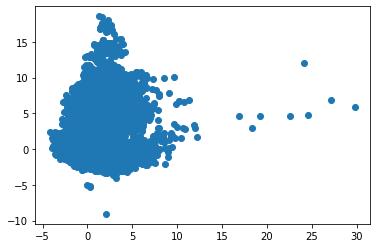

In [159]:
plt.scatter(op[:, 0], op[:, 1])

1
4
7
10
13
16
19


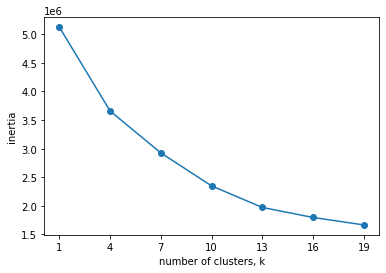

In [172]:
ks = range(1, 20, 3)
inertias = []
for k in ks:
    print(k)
    
    model = KMeans(n_clusters=k)
    model.fit(op)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [0]:
kmeans = KMeans(n_clusters=20)
kmeans.fit(op)

In [0]:
ans = kmeans.predict(op)

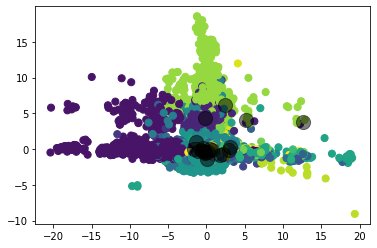

In [180]:
plt.scatter(op[:, 9], op[:, 1],c=ans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [0]:
df = train

In [0]:

test.fillna(0, inplace=True)

feature_names = list(test.columns)
feature_names.remove("date_time")

features = test[feature_names].values

print("Making predictions")
predictions = kmeans.predict(features)[:,1]
